# Симбиоз

In [1]:
from IPython.display import Image
display(Image(url='./chm5_7.png'))
display(Image(url='./chm5_8.png'))
display(Image(url='./chm5_9.png'))

In [2]:
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
a = 0.3
b = 0.1
c = 4

t, dt = 400, 50
pop = [[(i*4,j*4)] for i in range(1,10,2) for j in range(1,10,2)]
pop.append([(0,0)])
pop.append([(40,0)])
pop.append([(0,40)])

for step in range(t):
    for i in range(len(pop)):
        n1, n2 = pop[i][-1]
        n1_ = (c - a*n1 + b*n2)*n1
        n2_ = (c - a*n2 + b*n1)*n2
        pop[i].append((n1_/dt+n1,n2_/dt+n2))

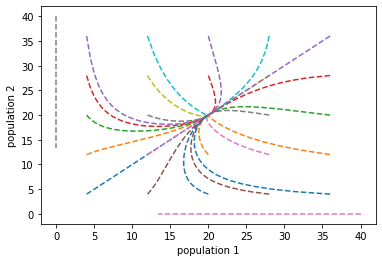

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

lines = []
for i in range(len(pop)):
    n1 = [pop[i][k][0] for k in range(t)]
    n2 = [pop[i][k][1] for k in range(t)]
    lines.append(ax1.plot(n1,n2, '--'))
    
plt.xlabel('population 1')
plt.ylabel('population 2')
plt.show()

In [5]:
a = 0.1
b = 0.3
c = 4

steps = 8
pop = [[(i*4,j*4)] for i in range(1,7,2) for j in range(1,7,2)]
pop.append([(0,0)])
pop.append([(40,0)])
pop.append([(0,40)])

for step in range(steps):
    for i in range(len(pop)):
        n1, n2 = pop[i][-1]
        n1_ = (c - a*n1 + b*n2)*n1
        n2_ = (c - a*n2 + b*n1)*n2
        pop[i].append((n1_/50+n1,n2_/50+n2))

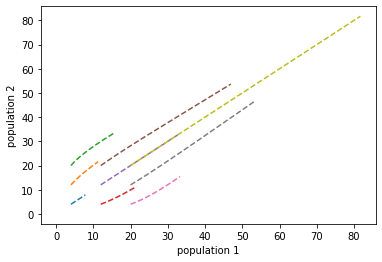

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

lines = []
for i in range(len(pop)):
    n1 = [pop[i][k][0] for k in range(steps)]
    n2 = [pop[i][k][1] for k in range(steps)]
    lines.append(ax1.plot(n1,n2, '--'))
    
plt.xlabel('population 1')
plt.ylabel('population 2')
plt.show()

## Задание 2.7
#### Доказать, что при a ≤ b для любых положительных начальных данных справедливо Ni(t)→+∞.
----

Найдем общий прирост к популяциям

In [7]:
display(Image(url='./chm6_1.png'))

Если N1 >> N2, то 
    N1' = N1(c - a*N1 + b*N2) < 0
    N2' = N2(c - a*N2 + b*N1) > 0

Придем к результату


In [8]:
display(Image(url='./chm6_2.png'))

Т.о.  (N1+N2)(t)→+∞
Значит, хотя бы одна из них тоже стремится к +∞, н.у.о. - <b>N1(t)→+∞</b>

Пусть, Ν2 останется конечной, тогда <b>N2'=N2(c-aN2+bN1)</b> - бесконечная, чего быть не может

## Задание 2.8

----

In [9]:
display(Image(url='./chm6_3.png'))
display(Image(url='./chm6_4.png'))
print('Ответ:')
display(Image(url='./chm6_5.png'))
display(Image(url='./chm6_6.png'))

Ответ:


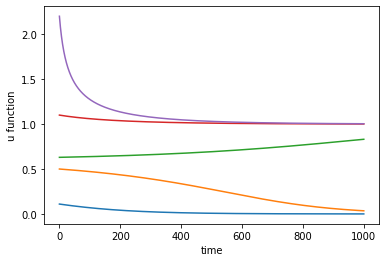

In [10]:

l = 0.6
u = [[0.11], [0.50], [0.63], [1.1], [2.2]]

tfin, dt = 1000, 100
for t in range(tfin*dt):
    for i in range(len(u)):
        u0 = u[i][-1]
        u_ = u0 * (u0 - l) * (1 - u0)
        u[i].append(max(u0+u_/dt/100,0))
        
fig = plt.figure()
ax1 = fig.add_subplot(111)

lines = []
for i in range(len(u)):
    lines.append(ax1.plot([i/dt for i in range(tfin*dt+1)], u[i]))

plt.ylabel('u function')
plt.xlabel('time')
    
plt.show()

comm = '''
K = 1000
L = 20
a = 0.03
N1 = [[150],[300],[700],[900],[1100]]

tfin, dt = 100, 100
for t in range(tfin*dt):
    for i in range(len(N1)):
        n = N1[i][-1]
        n_ = n * a * (n-L) * (K - n) / K
        N1[i].append(max(n+n_/dt/200,0))

fig = plt.figure()
ax1 = fig.add_subplot(111)

lines = []
for i in range(len(N1)):
    lines.append(ax1.plot([i/dt for i in range(tfin*dt+1)], N1[i], '--'))
'''
display(Image(url='./chm6_7.png'))


<code>v' = 0 ⇔ (v = 0) | (u = m)
v = 0:
    u' = u * (u-l) * (1-u)
    u' = 0 ⇔ (u = 0) | (u = l) | (u = 1)
u = m:
    u' = m * (m-l) * (1-m) - mv
    u' = 0 ⇔ v = (m-l) * (1-m)</code>
    
Итого, 4 точки равновесия: (0, 0), (l, 0), (1, 0), (m, (m-l)*(1-m))

Рассмотрим устойчивость каждой из них

#### 1. u = ε1, v = ε2; ε1,ε2 - малые
u' = ε1 * (ε1-l) * (1-ε1) < 0

v' = -A * m * ε2 < 0

<b> (0, 0) - устойчива </b>


#### 2. u = l+ε1, v = ε2; ε1,ε2 - малые
u' = (l+ε1) * ε1 * (1 - l - ε1)

ε1> 0 -> u' > 0 - неустойчива

<b> (l, 0) - неустойчива </b>


#### 3. u = 1+ε1, v = ε2; ε1,ε2 - малые
u' = - (1 + e1) * (1 + e1 - l) * e1 - отличного от е1 знака

v' = - A * (m - e1 - 1) * e2 - отличного от е2 знака

<b> (m, 0) - устойчива </b>


#### 4. u = m+e1, v = (m-l) * (1-m)+e1; ε1,ε2 - малые
u' = (m + e1) * (m + e1 - l) * (1 - m - e1) - (m + e1) * (m - l) * (1 - m)

= (m + e1) * e1 * (1 - 2m + l - e1) - того же знака, что и е1

<b> (m, (m-l)*(1-m) - неустойчива </b>
